In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import pickle

from sklearn.linear_model import LogisticRegression 

import matplotlib.pyplot as plt
import matplotlib.axes as axs
import seaborn as sns
sns.set()

In [3]:
df_purchase = pd.read_csv(r'C:\Users\admin\Desktop\purchase%20data.csv')

scaler = pickle.load(open('scaler.pickle', 'rb'))
pca = pickle.load(open('pca.pickle', 'rb'))
kmeans_pca = pickle.load(open('kmeans_pca.pickle', 'rb'))

features = df_purchase[['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']]
df_purchase_segm_std = scaler.transform(features)
df_purchase_segm_pca = pca.transform(df_purchase_segm_std)
purchase_segm_kmeans_pca = kmeans_pca.predict(df_purchase_segm_pca)

df_purchase_predictors = df_purchase.copy()
df_purchase_predictors['Segment'] = purchase_segm_kmeans_pca
segment_dummies = pd.get_dummies(purchase_segm_kmeans_pca, prefix = 'Segment', prefix_sep = '_')
df_purchase_predictors = pd.concat([df_purchase_predictors, segment_dummies], axis = 1)

df_pa = df_purchase_predictors


In [4]:
Y = df_pa['Incidence']

In [5]:
X = pd.DataFrame()
X['Mean_Price'] = (df_pa['Price_1'] +
                   df_pa['Price_2'] +
                   df_pa['Price_3'] +
                   df_pa['Price_4'] +
                   df_pa['Price_5'] ) / 5

In [6]:
model_purchase = LogisticRegression(solver = 'sag')
model_purchase.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [7]:
model_purchase.coef_

array([[-2.34840905]])

# Price Elasticity of Purchase Probability

In [8]:
df_pa[['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']].describe()

,Price_1,Price_2,Price_3,Price_4,Price_5
count,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000
mean,1.392074,1.780999,2.006789,2.159945,2.654798
std,0.091139,0.170868,0.046867,0.089825,0.098272
min,1.100000,1.260000,1.870000,1.760000,2.110000
25%,1.340000,1.580000,1.970000,2.120000,2.630000
50%,1.390000,1.880000,2.010000,2.170000,2.670000
75%,1.470000,1.890000,2.060000,2.240000,2.700000
max,1.590000,1.900000,2.140000,2.260000,2.800000


In [9]:
price_range = np.arange(0.5, 3.5, 0.01)

In [10]:
df_price_range = pd.DataFrame(price_range)

In [11]:
Y_pr = model_purchase.predict_proba(df_price_range)
purchase_pr = Y_pr[:][:, 1]
pe = model_purchase.coef_[:, 0] * price_range * (1 - purchase_pr)

In [12]:
df_price_elasticities = pd.DataFrame(price_range)

In [13]:
df_price_elasticities = df_price_elasticities.rename(columns = {0: "Price_Point"})
df_price_elasticities['Mean_PE'] = pe
df_price_elasticities

,Price_Point,Mean_PE
0,0.50,-0.096405
1,0.51,-0.100474
2,0.52,-0.104670
3,0.53,-0.108996
4,0.54,-0.113455
...,...,...
295,3.45,-8.014192
296,3.46,-8.039444
297,3.47,-8.064662
298,3.48,-8.089846


Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

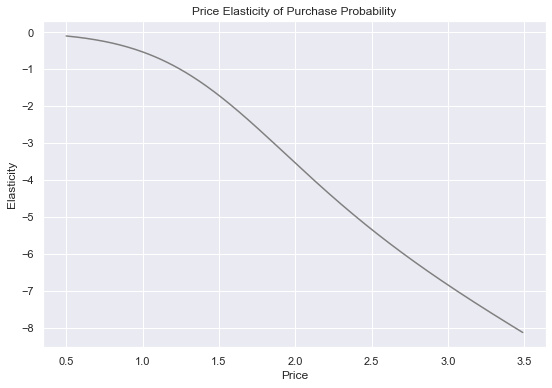

In [14]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, pe, color = 'grey')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

# Purchase Probability by Segments

In [15]:
df_pa_segment_1 = df_pa[df_pa['Segment'] == 1]

In [16]:
Y = df_pa_segment_1['Incidence']

In [17]:
X = pd.DataFrame()

In [18]:
X['Mean_Price'] = (df_pa_segment_1['Price_1'] + 
                   df_pa_segment_1['Price_2'] + 
                   df_pa_segment_1['Price_3'] + 
                   df_pa_segment_1['Price_4'] + 
                   df_pa_segment_1['Price_5']) / 5

In [19]:
model_incidence_segment_1 = LogisticRegression(solver = 'sag')
model_incidence_segment_1.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
model_incidence_segment_1.coef_

array([[-3.63789738]])

In [21]:
Y_segment_1 = model_incidence_segment_1.predict_proba(df_price_range)
purchase_pr_segment_1 = Y_segment_1[:][:, 1]
pe_segment_1 = model_incidence_segment_1.coef_[:, 0] * price_range * (1 - purchase_pr_segment_1)

# Results

In [22]:
df_price_elasticities['PE_Segment_1'] = pe_segment_1

Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

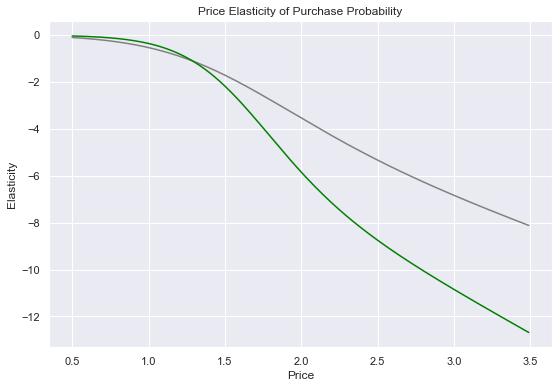

In [23]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, pe, color = 'grey')
plt.plot(price_range, pe_segment_1, color = 'green')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

In [24]:
df_pa_segment_2 = df_pa[df_pa['Segment'] == 2]

In [25]:
Y = df_pa_segment_2['Incidence']

X = pd.DataFrame()
X['Mean_Price'] = (df_pa_segment_2['Price_1'] + 
                   df_pa_segment_2['Price_2'] + 
                   df_pa_segment_2['Price_3'] + 
                   df_pa_segment_2['Price_4'] + 
                   df_pa_segment_2['Price_5']) / 5

model_incidence_segment2 = LogisticRegression(solver = 'sag')
model_incidence_segment2.fit(X, Y)

model_incidence_segment2.coef_
Y_segment_2 = model_incidence_segment2.predict_proba(df_price_range)
purchase_pr_segment2 = Y_segment_2[:][: , 1]
pe_segment2 = model_incidence_segment2.coef_[:,0] * price_range * ( 1- purchase_pr_segment2)

In [26]:
df_price_elasticities['PE_Segment_2'] = pe_segment2

Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

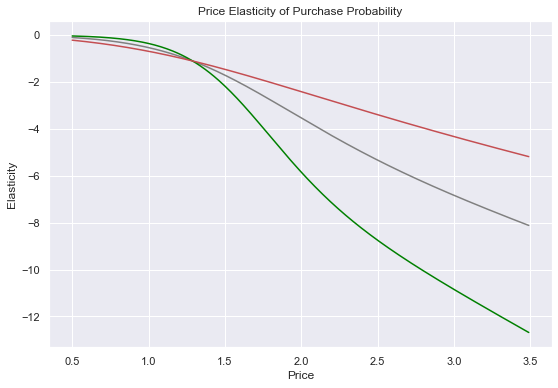

In [27]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, pe, color = 'grey')
plt.plot(price_range, pe_segment_1, color = 'green')
plt.plot(price_range, pe_segment2, color = 'r')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

In [28]:
df_pa_segment_3 = df_pa[df_pa['Segment'] == 3]

Y = df_pa_segment_3['Incidence']

X = pd.DataFrame()
X['Mean_Price'] = (df_pa_segment_3['Price_1'] + 
                   df_pa_segment_3['Price_2'] + 
                   df_pa_segment_3['Price_3'] + 
                   df_pa_segment_3['Price_4'] + 
                   df_pa_segment_3['Price_5']) / 5

model_incidence_segment3 = LogisticRegression(solver = 'sag')
model_incidence_segment3.fit(X, Y)

model_incidence_segment3.coef_
Y_segment_3 = model_incidence_segment2.predict_proba(df_price_range)
purchase_pr_segment3 = Y_segment_3[:][: , 1]
pe_segment3 = model_incidence_segment3.coef_[:,0] * price_range *( 1- purchase_pr_segment3)
df_price_elasticities['PE_Segment_3'] = pe_segment3
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_1,PE_Segment_2,PE_Segment_3
0,0.50,-0.096405,-0.031029,-0.210078,-0.235953
1,0.51,-0.100474,-0.032801,-0.216655,-0.243340
2,0.52,-0.104670,-0.034661,-0.223341,-0.250849
3,0.53,-0.108996,-0.036611,-0.230138,-0.258483
4,0.54,-0.113455,-0.038657,-0.237045,-0.266242
...,...,...,...,...,...
295,3.45,-8.014192,-12.534972,-5.110995,-5.740506
296,3.46,-8.039444,-12.571870,-5.128015,-5.759623
297,3.47,-8.064662,-12.608750,-5.145017,-5.778719
298,3.48,-8.089846,-12.645615,-5.162000,-5.797793


In [30]:
df_pa_segment_0 = df_pa[df_pa['Segment'] == 0]

Y = df_pa_segment_0['Incidence']

X = pd.DataFrame()
X['Mean_Price'] = (df_pa_segment_0['Price_1'] + 
                   df_pa_segment_0['Price_2'] + 
                   df_pa_segment_0['Price_3'] + 
                   df_pa_segment_0['Price_4'] + 
                   df_pa_segment_0['Price_5']) / 5

model_incidence_segment0 = LogisticRegression(solver = 'sag')
model_incidence_segment0.fit(X, Y)

model_incidence_segment0.coef_
Y_segment_0 = model_incidence_segment0.predict_proba(df_price_range)
purchase_pr_segment0 = Y_segment_0[:][: , 1]
pe_segment0 = model_incidence_segment0.coef_[:,0] * price_range *( 1- purchase_pr_segment0)
df_price_elasticities.insert(2, column = 'PE_Segment_0', value = pe_segment0)


Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

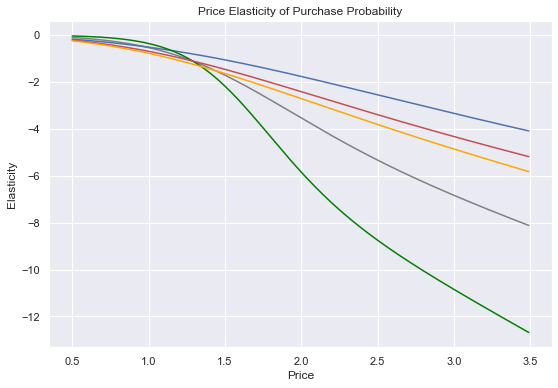

In [31]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, pe, color = 'grey')
plt.plot(price_range, pe_segment0, color = 'b')
plt.plot(price_range, pe_segment_1, color = 'green')
plt.plot(price_range, pe_segment2, color = 'r')
plt.plot(price_range, pe_segment3, color = 'orange')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

In [32]:
df_pa_segment_3 = df_pa[df_pa['Segment'] == 3]

Y = df_pa_segment_3['Incidence']

X = pd.DataFrame()
X['Mean_Price'] = (df_pa_segment_3['Price_1'] + 
                   df_pa_segment_3['Price_2'] + 
                   df_pa_segment_3['Price_3'] + 
                   df_pa_segment_3['Price_4'] + 
                   df_pa_segment_3['Price_5']) / 5

model_incidence_segment3 = LogisticRegression(solver = 'sag')
model_incidence_segment3.fit(X, Y)

model_incidence_segment3.coef_
Y_segment_3 = model_incidence_segment2.predict_proba(df_price_range)
purchase_pr_segment3 = Y_segment_3[:][: , 1]
pe_segment3 = model_incidence_segment3.coef_[:,0] * price_range *( 1- purchase_pr_segment3)
df_price_elasticities['PE_Segment_3'] = pe_segment3
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3
0,0.50,-0.096405,-0.168057,-0.031029,-0.210078,-0.235828
1,0.51,-0.100474,-0.172982,-0.032801,-0.216655,-0.243211
2,0.52,-0.104670,-0.177978,-0.034661,-0.223341,-0.250717
3,0.53,-0.108996,-0.183044,-0.036611,-0.230138,-0.258347
4,0.54,-0.113455,-0.188182,-0.038657,-0.237045,-0.266101
...,...,...,...,...,...,...
295,3.45,-8.014192,-4.022280,-12.534972,-5.110995,-5.737471
296,3.46,-8.039444,-4.037148,-12.571870,-5.128015,-5.756578
297,3.47,-8.064662,-4.051999,-12.608750,-5.145017,-5.775664
298,3.48,-8.089846,-4.066833,-12.645615,-5.162000,-5.794728


Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

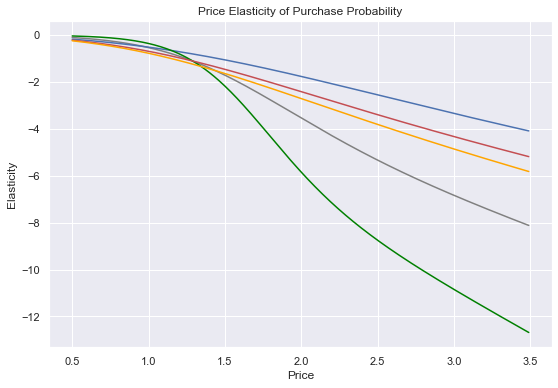

In [33]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, pe, color = 'grey')
plt.plot(price_range, pe_segment0, color = 'b')
plt.plot(price_range, pe_segment_1, color = 'green')
plt.plot(price_range, pe_segment2, color = 'r')
plt.plot(price_range, pe_segment3, color = 'orange')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

# Purchase Probability with Promotion Feature

In [34]:
Y = df_pa['Incidence']

In [35]:
X = pd.DataFrame()
X['Mean_Price'] = (df_pa['Price_1'] + 
                   df_pa['Price_2'] + 
                   df_pa['Price_3'] + 
                   df_pa['Price_4'] + 
                   df_pa['Price_5']) / 5

X['Mean_Promotion'] = (df_pa['Promotion_1'] +
                       df_pa['Promotion_2'] +
                       df_pa['Promotion_3'] +
                       df_pa['Promotion_4'] +
                       df_pa['Promotion_5'] ) / 5
X.head()


,Mean_Price,Mean_Promotion
0,2.044,0.2
1,2.028,0.0
2,2.028,0.0
3,2.028,0.0
4,2.030,0.0


In [36]:
model_incidence_promotion = LogisticRegression(solver = 'sag')
model_incidence_promotion.fit(X, Y)
model_incidence_promotion.coef_


array([[-1.49394757,  0.56152336]])

In [37]:
df_price_elasticity_promotion = pd.DataFrame(price_range)
df_price_elasticity_promotion = df_price_elasticity_promotion.rename(columns = {0: "Price_Range"})
df_price_elasticity_promotion['Promotion'] = 1

Y_promotion = model_incidence_promotion.predict_proba(df_price_elasticity_promotion)

promo = Y_promotion[:, 1]
price_elasticity_promo = (model_incidence_promotion.coef_[:, 0] * price_range) * (1 - promo)
df_price_elasticities['Elasticity_Promotion_1'] = price_elasticity_promo
df_price_elasticities


,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1
0,0.50,-0.096405,-0.168057,-0.031029,-0.210078,-0.235828,-0.125736
1,0.51,-0.100474,-0.172982,-0.032801,-0.216655,-0.243211,-0.129853
2,0.52,-0.104670,-0.177978,-0.034661,-0.223341,-0.250717,-0.134048
3,0.53,-0.108996,-0.183044,-0.036611,-0.230138,-0.258347,-0.138323
4,0.54,-0.113455,-0.188182,-0.038657,-0.237045,-0.266101,-0.142679
...,...,...,...,...,...,...,...
295,3.45,-8.014192,-4.022280,-12.534972,-5.110995,-5.737471,-4.861332
296,3.46,-8.039444,-4.037148,-12.571870,-5.128015,-5.756578,-4.879533
297,3.47,-8.064662,-4.051999,-12.608750,-5.145017,-5.775664,-4.897703
298,3.48,-8.089846,-4.066833,-12.645615,-5.162000,-5.794728,-4.915843


Text(0.5, 1.0, 'Price Elasticity of Purchase Probability with and without Promotion')

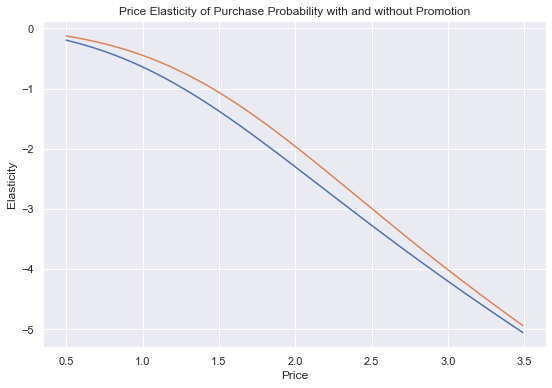

In [38]:
df_price_elasticity_promotion_no = pd.DataFrame(price_range)
df_price_elasticity_promotion_no = df_price_elasticity_promotion_no.rename(columns = {0: "Price_Range"})

df_price_elasticity_promotion_no['Promotion'] = 0

Y_no_promo = model_incidence_promotion.predict_proba(df_price_elasticity_promotion_no)

no_promo = Y_no_promo[: , 1]

price_elasticity_no_promo = model_incidence_promotion.coef_[:, 0] * price_range *(1- no_promo)

df_price_elasticities['Elasticity_Promotion_0'] = price_elasticity_no_promo

plt.figure(figsize = (9, 6))
plt.plot(price_range, price_elasticity_no_promo)
plt.plot(price_range, price_elasticity_promo)
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability with and without Promotion')


In [39]:
brand_choice = df_pa[df_pa['Incidence'] == 1]


In [40]:
pd.options.display.max_rows = 100
brand_choice

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
6,200000001,28,1,2,2,0,0,1.50,1.90,1.99,...,47,1,110866,1,0,1,0,1,0,0
11,200000001,58,1,5,1,0,0,1.39,1.90,1.91,...,47,1,110866,1,0,1,0,1,0,0
19,200000001,110,1,1,2,0,0,1.47,1.90,1.99,...,47,1,110866,1,0,1,0,1,0,0
24,200000001,142,1,4,1,0,0,1.21,1.35,1.99,...,47,1,110866,1,0,1,0,1,0,0
29,200000001,183,1,2,3,0,0,1.46,1.88,1.97,...,47,1,110866,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58621,200000500,296,1,2,6,0,0,1.48,1.89,2.01,...,42,1,120946,1,0,1,0,1,0,0
58648,200000500,460,1,1,12,0,0,1.35,1.57,2.02,...,42,1,120946,1,0,1,0,1,0,0
58674,200000500,641,1,2,7,0,0,1.50,1.85,2.06,...,42,1,120946,1,0,1,0,1,0,0
58687,200000500,697,1,2,6,0,0,1.42,1.51,1.97,...,42,1,120946,1,0,1,0,1,0,0


In [41]:
Y = brand_choice['Brand']


In [42]:
features = ['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']
X = brand_choice[features]

In [43]:
model_brand_choice = LogisticRegression(solver = 'sag', multi_class = 'multinomial')
model_brand_choice.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
model_brand_choice.coef_

array([[-3.91596788,  0.65845546,  2.41766561,  0.70407484, -0.20212503],
       [ 1.2746084 , -1.8798573 , -0.2126631 , -0.20634432,  0.58786561],
       [ 1.62421132,  0.56212057,  0.50099578,  1.03952912,  0.45281915],
       [ 0.57453244,  0.39558514, -1.40062992, -1.24624836,  0.24934455],
       [ 0.44261572,  0.26369614, -1.30536837, -0.29101128, -1.08790428]])

In [45]:
bc_coef = pd.DataFrame(model_brand_choice.coef_)
bc_coef

,0,1,2,3,4
0,-3.915968,0.658455,2.417666,0.704075,-0.202125
1,1.274608,-1.879857,-0.212663,-0.206344,0.587866
2,1.624211,0.562121,0.500996,1.039529,0.452819
3,0.574532,0.395585,-1.400630,-1.246248,0.249345
4,0.442616,0.263696,-1.305368,-0.291011,-1.087904


In [46]:
bc_coef = pd.DataFrame(np.transpose(model_brand_choice.coef_))
coefficients = ['Coef_Brand_1', 'Coef_Brand_2', 'Coef_Brand_3', 'Coef_Brand_4', 'Coef_Brand_5']
bc_coef.columns = [coefficients]
prices = ['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)
bc_coef

,Coef_Brand_1,Coef_Brand_2,Coef_Brand_3,Coef_Brand_4,Coef_Brand_5
Price_1,-3.92,1.27,1.62,0.57,0.44
Price_2,0.66,-1.88,0.56,0.40,0.26
Price_3,2.42,-0.21,0.50,-1.40,-1.31
Price_4,0.70,-0.21,1.04,-1.25,-0.29
Price_5,-0.20,0.59,0.45,0.25,-1.09


In [47]:
df_own_brand_5 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5['Price_1'] = brand_choice['Price_1'].mean()
df_own_brand_5['Price_2'] = brand_choice['Price_2'].mean()
df_own_brand_5['Price_3'] = brand_choice['Price_3'].mean()
df_own_brand_5['Price_4'] = brand_choice['Price_4'].mean()
df_own_brand_5['Price_5'] = price_range
df_own_brand_5

,Price_1,Price_2,Price_3,Price_4,Price_5
0,1.384559,1.764717,2.006694,2.159658,0.50
1,1.384559,1.764717,2.006694,2.159658,0.51
2,1.384559,1.764717,2.006694,2.159658,0.52
3,1.384559,1.764717,2.006694,2.159658,0.53
4,1.384559,1.764717,2.006694,2.159658,0.54
...,...,...,...,...,...
295,1.384559,1.764717,2.006694,2.159658,3.45
296,1.384559,1.764717,2.006694,2.159658,3.46
297,1.384559,1.764717,2.006694,2.159658,3.47
298,1.384559,1.764717,2.006694,2.159658,3.48


In [48]:
predict_brand_5 = model_brand_choice.predict_proba(df_own_brand_5)

pr_own_brand_5 = predict_brand_5[: ][:, 4]

beta5 = bc_coef.iloc[4, 4]
beta5
own_price_elasticity_brand_5 = beta5 * price_range * (1 - pr_own_brand_5)

df_price_elasticities['Brand_5'] = own_price_elasticity_brand_5
pd.options.display.max_rows = None
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5
0,0.50,-0.096405,-0.168057,-0.031029,-0.210078,-0.235828,-0.125736,-0.195649,-0.049056
1,0.51,-0.100474,-0.172982,-0.032801,-0.216655,-0.243211,-0.129853,-0.201770,-0.050617
2,0.52,-0.104670,-0.177978,-0.034661,-0.223341,-0.250717,-0.134048,-0.207994,-0.052207
3,0.53,-0.108996,-0.183044,-0.036611,-0.230138,-0.258347,-0.138323,-0.214321,-0.053827
4,0.54,-0.113455,-0.188182,-0.038657,-0.237045,-0.266101,-0.142679,-0.220752,-0.055478
5,0.55,-0.118051,-0.193391,-0.040802,-0.244065,-0.273981,-0.147117,-0.227288,-0.057159
6,0.56,-0.122787,-0.198673,-0.043050,-0.251198,-0.281988,-0.151637,-0.233930,-0.058871
7,0.57,-0.127666,-0.204027,-0.045407,-0.258444,-0.290122,-0.156242,-0.240678,-0.060615
8,0.58,-0.132692,-0.209455,-0.047876,-0.265804,-0.298385,-0.160932,-0.247534,-0.062391
9,0.59,-0.137868,-0.214956,-0.050464,-0.273279,-0.306776,-0.165707,-0.254498,-0.064200


Text(0.5, 1.0, 'Own Price Elasticity of Purchase Probability for Brand 5')

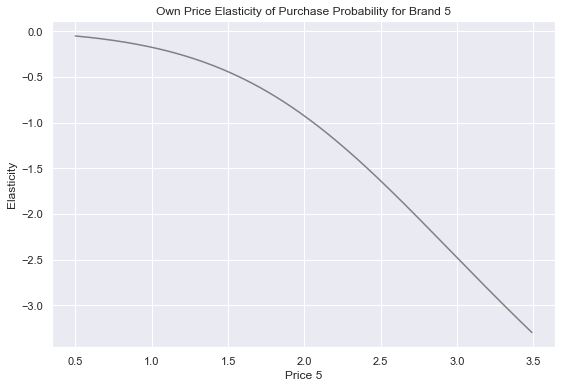

In [49]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, own_price_elasticity_brand_5, color = 'grey')
plt.xlabel('Price 5')
plt.ylabel('Elasticity')
plt.title('Own Price Elasticity of Purchase Probability for Brand 5')

In [50]:
df_brand5_cross_brand4 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4['Price_1'] = brand_choice['Price_1'].mean()
df_brand5_cross_brand4['Price_2'] = brand_choice['Price_2'].mean()
df_brand5_cross_brand4['Price_3'] = brand_choice['Price_3'].mean()
df_brand5_cross_brand4['Price_4'] = price_range
df_brand5_cross_brand4['Price_5'] = brand_choice['Price_5'].mean()

In [51]:
df_brand5_cross_brand4.head()

,Price_1,Price_2,Price_3,Price_4,Price_5
0,1.384559,1.764717,2.006694,0.50,2.654296
1,1.384559,1.764717,2.006694,0.51,2.654296
2,1.384559,1.764717,2.006694,0.52,2.654296
3,1.384559,1.764717,2.006694,0.53,2.654296
4,1.384559,1.764717,2.006694,0.54,2.654296


In [52]:
predict_brand5_cross_brand4 = model_brand_choice.predict_proba(df_brand5_cross_brand4)

pr_brand_4 = predict_brand5_cross_brand4[:][:, 3]
beta5
brand5_cross_brand4_price_elasticity = -beta5 * price_range * pr_brand_4
df_price_elasticities['Brand_5_Cross_Brand_4'] = brand5_cross_brand4_price_elasticity
df_price_elasticities


,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5,Brand_5_Cross_Brand_4
0,0.50,-0.096405,-0.168057,-0.031029,-0.210078,-0.235828,-0.125736,-0.195649,-0.049056,0.332012
1,0.51,-0.100474,-0.172982,-0.032801,-0.216655,-0.243211,-0.129853,-0.201770,-0.050617,0.337288
2,0.52,-0.104670,-0.177978,-0.034661,-0.223341,-0.250717,-0.134048,-0.207994,-0.052207,0.342507
3,0.53,-0.108996,-0.183044,-0.036611,-0.230138,-0.258347,-0.138323,-0.214321,-0.053827,0.347669
4,0.54,-0.113455,-0.188182,-0.038657,-0.237045,-0.266101,-0.142679,-0.220752,-0.055478,0.352773
5,0.55,-0.118051,-0.193391,-0.040802,-0.244065,-0.273981,-0.147117,-0.227288,-0.057159,0.357820
6,0.56,-0.122787,-0.198673,-0.043050,-0.251198,-0.281988,-0.151637,-0.233930,-0.058871,0.362809
7,0.57,-0.127666,-0.204027,-0.045407,-0.258444,-0.290122,-0.156242,-0.240678,-0.060615,0.367741
8,0.58,-0.132692,-0.209455,-0.047876,-0.265804,-0.298385,-0.160932,-0.247534,-0.062391,0.372614
9,0.59,-0.137868,-0.214956,-0.050464,-0.273279,-0.306776,-0.165707,-0.254498,-0.064200,0.377430


Text(0.5, 1.0, 'Cross Price Elasticity of Brand 5 wrt to Brand 4')

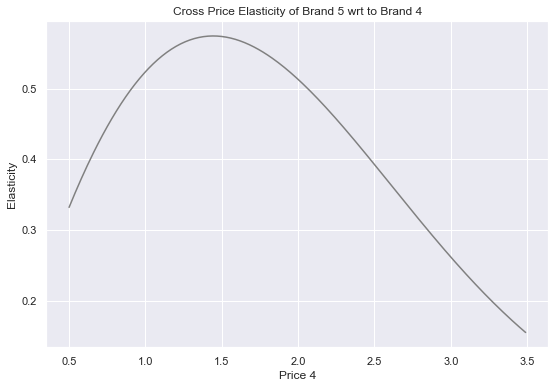

In [53]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, brand5_cross_brand4_price_elasticity, color = 'grey')
plt.xlabel('Price 4')
plt.ylabel('Elasticity')
plt.title('Cross Price Elasticity of Brand 5 wrt to Brand 4')

In [54]:
brand_choice_s3 = df_pa[df_pa['Incidence'] == 1]
brand_choice_s3 = brand_choice_s3[brand_choice_s3['Segment'] == 3]

pd.options.display.max_rows = 100
brand_choice_s3

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
376,200000005,51,1,5,1,0,0,1.35,1.87,1.93,...,49,1,121466,1,2,3,0,0,0,1
377,200000005,57,1,5,1,5,1,1.39,1.90,1.91,...,49,1,121466,1,2,3,0,0,0,1
394,200000005,159,1,5,2,0,0,1.39,1.90,1.94,...,49,1,121466,1,2,3,0,0,0,1
396,200000005,178,1,5,3,0,0,1.48,1.50,1.99,...,49,1,121466,1,2,3,0,0,0,1
410,200000005,249,1,5,1,0,0,1.46,1.89,1.99,...,49,1,121466,1,2,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57586,200000491,690,1,5,2,5,1,1.50,1.87,2.06,...,35,1,150237,2,2,3,0,0,0,1
57587,200000491,697,1,5,5,5,1,1.42,1.51,1.97,...,35,1,150237,2,2,3,0,0,0,1
57588,200000491,704,1,5,5,5,1,1.41,1.85,2.01,...,35,1,150237,2,2,3,0,0,0,1
57589,200000491,714,1,5,1,5,1,1.50,1.80,2.09,...,35,1,150237,2,2,3,0,0,0,1


In [55]:
Y = brand_choice_s3['Brand']
brand_choice_s3 = pd.get_dummies(brand_choice_s3, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_s3[features]
model_brand_choice_s3 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 300)
model_brand_choice_s3.fit(X, Y)

#coefficients table for segment 3
bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s3.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)
bc_coef

,Coef_Brand_1,Coef_Brand_2,Coef_Brand_3,Coef_Brand_4,Coef_Brand_5
Price_1,-2.38,1.13,1.39,-0.02,-0.11
Price_2,0.73,-1.65,0.05,0.40,0.47
Price_3,1.17,0.21,0.46,-1.71,-0.13
Price_4,0.03,0.65,0.41,-1.08,-0.01
Price_5,-0.00,-0.20,0.34,0.42,-0.55


In [56]:
df_own_brand_5_s3 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_s3['Price_1'] = brand_choice_s3['Price_1'].mean()
df_own_brand_5_s3['Price_2'] = brand_choice_s3['Price_2'].mean()
df_own_brand_5_s3['Price_3'] = brand_choice_s3['Price_3'].mean()
df_own_brand_5_s3['Price_4'] = brand_choice_s3['Price_4'].mean()
df_own_brand_5_s3['Price_5'] = price_range

predict_own_brand_5_s3 = model_brand_choice_s3.predict_proba(df_own_brand_5_s3)
pr_own_brand_5_s3 = predict_own_brand_5_s3[: ][: , 4]

own_price_elasticity_brand_5_s3 =  beta5 * price_range * (1 - pr_own_brand_5_s3)
df_price_elasticities['Brand 5 S3'] = own_price_elasticity_brand_5_s3

In [57]:
df_brand5_cross_brand4_s3 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_s3['Price_1'] = brand_choice_s3['Price_1'].mean()
df_brand5_cross_brand4_s3['Price_2'] = brand_choice_s3['Price_2'].mean()
df_brand5_cross_brand4_s3['Price_3'] = brand_choice_s3['Price_3'].mean()
df_brand5_cross_brand4_s3['Price_4'] = price_range
df_brand5_cross_brand4_s3['Price_5'] = brand_choice_s3['Price_5'].mean()

predict_brand5_cross_brand4_s3 = model_brand_choice_s3.predict_proba(df_brand5_cross_brand4_s3)
pr_cross_brand_5_s3 = predict_brand5_cross_brand4_s3[: ][: , 3]

brand5_cross_brand4_price_elasticity_s3 = -beta5 * price_range * pr_cross_brand_5_s3
df_price_elasticities['Brand_5_Cross_Brand_4_S3'] = brand5_cross_brand4_price_elasticity_s3
pd.options.display.max_rows = None
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5,Brand_5_Cross_Brand_4,Brand 5 S3,Brand_5_Cross_Brand_4_S3
0,0.50,-0.096405,-0.168057,-0.031029,-0.210078,-0.235828,-0.125736,-0.195649,-0.049056,0.332012,-0.043940,0.194769
1,0.51,-0.100474,-0.172982,-0.032801,-0.216655,-0.243211,-0.129853,-0.201770,-0.050617,0.337288,-0.045026,0.197253
2,0.52,-0.104670,-0.177978,-0.034661,-0.223341,-0.250717,-0.134048,-0.207994,-0.052207,0.342507,-0.046123,0.199686
3,0.53,-0.108996,-0.183044,-0.036611,-0.230138,-0.258347,-0.138323,-0.214321,-0.053827,0.347669,-0.047228,0.202068
4,0.54,-0.113455,-0.188182,-0.038657,-0.237045,-0.266101,-0.142679,-0.220752,-0.055478,0.352773,-0.048343,0.204401
5,0.55,-0.118051,-0.193391,-0.040802,-0.244065,-0.273981,-0.147117,-0.227288,-0.057159,0.357820,-0.049467,0.206683
6,0.56,-0.122787,-0.198673,-0.043050,-0.251198,-0.281988,-0.151637,-0.233930,-0.058871,0.362809,-0.050601,0.208915
7,0.57,-0.127666,-0.204027,-0.045407,-0.258444,-0.290122,-0.156242,-0.240678,-0.060615,0.367741,-0.051745,0.211098
8,0.58,-0.132692,-0.209455,-0.047876,-0.265804,-0.298385,-0.160932,-0.247534,-0.062391,0.372614,-0.052898,0.213232
9,0.59,-0.137868,-0.214956,-0.050464,-0.273279,-0.306776,-0.165707,-0.254498,-0.064200,0.377430,-0.054061,0.215318


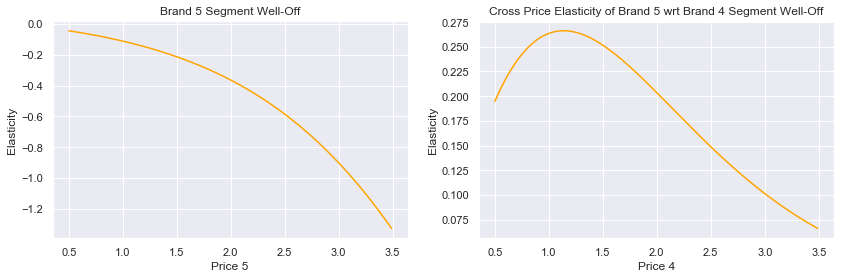

In [58]:
fig, axs = plt.subplots(1, 2, figsize = (14, 4))
axs[0].plot(price_range, own_price_elasticity_brand_5_s3, color = 'orange')
axs[0].set_title('Brand 5 Segment Well-Off')
axs[0].set_xlabel('Price 5')

axs[1].plot(price_range, brand5_cross_brand4_price_elasticity_s3, color = 'orange')
axs[1].set_title('Cross Price Elasticity of Brand 5 wrt Brand 4 Segment Well-Off')
axs[1].set_xlabel('Price 4')

for ax in axs.flat:
    ax.set(ylabel = 'Elasticity')


In [59]:
brand_choice_s0 = df_pa[df_pa['Incidence'] == 1]
brand_choice_s0 = brand_choice_s0[brand_choice_s0['Segment'] == 0]
brand_choice_s0.head()


,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
101,200000002,6,1,4,1,0,0,1.59,1.87,2.01,...,52,2,159052,2,1,0,1,0,0,0
115,200000002,100,1,4,2,0,0,1.47,1.90,1.95,...,52,2,159052,2,1,0,1,0,0,0
138,200000002,283,1,4,3,0,0,1.37,1.89,2.00,...,52,2,159052,2,1,0,1,0,0,0
141,200000002,307,1,4,1,0,0,1.34,1.89,2.01,...,52,2,159052,2,1,0,1,0,0,0
153,200000002,422,1,4,1,0,0,1.34,1.89,2.02,...,52,2,159052,2,1,0,1,0,0,0


In [60]:
Y = brand_choice_s0['Brand']
brand_choice_s0 = pd.get_dummies(brand_choice_s0, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_s0[features]
model_brand_choice_s0 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 200)
model_brand_choice_s0.fit(X, Y)

bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s0.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [61]:
df_own_brand_5_s0 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_s0['Price_1'] = brand_choice_s0['Price_1'].mean()
df_own_brand_5_s0['Price_2'] = brand_choice_s0['Price_2'].mean()
df_own_brand_5_s0['Price_3'] = brand_choice_s0['Price_3'].mean()
df_own_brand_5_s0['Price_4'] = brand_choice_s0['Price_4'].mean()
df_own_brand_5_s0['Price_5'] = price_range

predict_own_brand_5_s0 = model_brand_choice_s0.predict_proba(df_own_brand_5_s0)
pr_own_brand_5_s0 = predict_own_brand_5_s0[: ][: , 4]

own_price_elasticity_brand_5_s0 =  beta5 * price_range * (1 - pr_own_brand_5_s0)
df_price_elasticities.insert(10, column = 'Brand 5 S0', value = own_price_elasticity_brand_5_s0)

In [62]:
df_brand5_cross_brand4_s0 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_s0['Price_1'] = brand_choice_s0['Price_1'].mean()
df_brand5_cross_brand4_s0['Price_2'] = brand_choice_s0['Price_2'].mean()
df_brand5_cross_brand4_s0['Price_3'] = brand_choice_s0['Price_3'].mean()
df_brand5_cross_brand4_s0['Price_4'] = price_range
df_brand5_cross_brand4_s0['Price_5'] = brand_choice_s0['Price_5'].mean()

predict_brand5_cross_brand4_s0 = model_brand_choice_s0.predict_proba(df_brand5_cross_brand4_s0)
pr_cross_brand_5_s0 = predict_brand5_cross_brand4_s0[: ][: , 3]

brand5_cross_brand4_price_elasticity_s0 = -beta5 * price_range * pr_cross_brand_5_s0
df_price_elasticities.insert(11, column = 'Brand_5_Cross_Brand_4_S0', value = brand5_cross_brand4_price_elasticity_s0)

In [63]:
brand_choice_s1 = df_pa[df_pa['Incidence'] == 1]
brand_choice_s1 = brand_choice_s1[brand_choice_s1['Segment'] == 1]

In [64]:
Y = brand_choice_s1['Brand']
brand_choice_s1 = pd.get_dummies(brand_choice_s1, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_s1[features]
model_brand_choice_s1 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 300)
model_brand_choice_s1.fit(X, Y)

bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s1.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)

In [65]:
df_own_brand_5_s1 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_s1['Price_1'] = brand_choice_s1['Price_1'].mean()
df_own_brand_5_s1['Price_2'] = brand_choice_s1['Price_2'].mean()
df_own_brand_5_s1['Price_3'] = brand_choice_s1['Price_3'].mean()
df_own_brand_5_s1['Price_4'] = brand_choice_s1['Price_4'].mean()
df_own_brand_5_s1['Price_5'] = price_range

predict_own_brand_5_s1 = model_brand_choice_s1.predict_proba(df_own_brand_5_s1)
pr_own_brand_5_s1 = predict_own_brand_5_s1[: ][: , 4]

own_price_elasticity_brand_5_s1 =  beta5 * price_range * (1 - pr_own_brand_5_s1)
df_price_elasticities.insert(12, column = 'Brand 5 S1', value = own_price_elasticity_brand_5_s1)

In [66]:
df_brand5_cross_brand4_s1 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_s1['Price_1'] = brand_choice_s1['Price_1'].mean()
df_brand5_cross_brand4_s1['Price_2'] = brand_choice_s1['Price_2'].mean()
df_brand5_cross_brand4_s1['Price_3'] = brand_choice_s1['Price_3'].mean()
df_brand5_cross_brand4_s1['Price_4'] = price_range
df_brand5_cross_brand4_s1['Price_5'] = brand_choice_s1['Price_5'].mean()

predict_brand5_cross_brand4_s1 = model_brand_choice_s1.predict_proba(df_brand5_cross_brand4_s1)
pr_cross_brand_5_s1 = predict_brand5_cross_brand4_s1[: ][: , 3]

brand5_cross_brand4_price_elasticity_s1 = -beta5 * price_range * pr_cross_brand_5_s1
df_price_elasticities.insert(13, column = 'Brand_5_Cross_Brand_4_S1', value = brand5_cross_brand4_price_elasticity_s1)

In [67]:
brand_choice_s2 = df_pa[df_pa['Incidence'] == 1]
brand_choice_s2 = brand_choice_s2[brand_choice_s2['Segment'] == 2]

In [68]:
Y = brand_choice_s2['Brand']
brand_choice_s2 = pd.get_dummies(brand_choice_s2, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_s2[features]
model_brand_choice_s2 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 300)
model_brand_choice_s2.fit(X, Y)

bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s2.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)

In [69]:
df_own_brand_5_s2 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_s2['Price_1'] = brand_choice_s2['Price_1'].mean()
df_own_brand_5_s2['Price_2'] = brand_choice_s2['Price_2'].mean()
df_own_brand_5_s2['Price_3'] = brand_choice_s2['Price_3'].mean()
df_own_brand_5_s2['Price_4'] = brand_choice_s2['Price_4'].mean()
df_own_brand_5_s2['Price_5'] = price_range

predict_own_brand_5_s2 = model_brand_choice_s2.predict_proba(df_own_brand_5_s2)
pr_own_brand_5_s2 = predict_own_brand_5_s2[: ][: , 4]

own_price_elasticity_brand_5_s2 =  beta5 * price_range * (1 - pr_own_brand_5_s2)
df_price_elasticities.insert(14, column = 'Brand 5 S2', value = own_price_elasticity_brand_5_s2)

In [70]:
df_brand5_cross_brand4_s2 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_s2['Price_1'] = brand_choice_s2['Price_1'].mean()
df_brand5_cross_brand4_s2['Price_2'] = brand_choice_s2['Price_2'].mean()
df_brand5_cross_brand4_s2['Price_3'] = brand_choice_s2['Price_3'].mean()
df_brand5_cross_brand4_s2['Price_4'] = price_range
df_brand5_cross_brand4_s2['Price_5'] = brand_choice_s2['Price_5'].mean()

predict_brand5_cross_brand4_s2 = model_brand_choice_s2.predict_proba(df_brand5_cross_brand4_s2)
pr_cross_brand_5_s2 = predict_brand5_cross_brand4_s2[: ][: , 3]

brand5_cross_brand4_price_elasticity_s2 = -beta5 * price_range * pr_cross_brand_5_s2
df_price_elasticities.insert(15, column = 'Brand_5_Cross_Brand_4_S2', value = brand5_cross_brand4_price_elasticity_s2)
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5,Brand_5_Cross_Brand_4,Brand 5 S0,Brand_5_Cross_Brand_4_S0,Brand 5 S1,Brand_5_Cross_Brand_4_S1,Brand 5 S2,Brand_5_Cross_Brand_4_S2,Brand 5 S3,Brand_5_Cross_Brand_4_S3
0,0.50,-0.096405,-0.168057,-0.031029,-0.210078,-0.235828,-0.125736,-0.195649,-0.049056,0.332012,-0.297653,0.482432,-0.001034,0.187009,-0.116302,0.160490,-0.043940,0.194769
1,0.51,-0.100474,-0.172982,-0.032801,-0.216655,-0.243211,-0.129853,-0.201770,-0.050617,0.337288,-0.303702,0.491738,-0.001096,0.189372,-0.119351,0.162440,-0.045026,0.197253
2,0.52,-0.104670,-0.177978,-0.034661,-0.223341,-0.250717,-0.134048,-0.207994,-0.052207,0.342507,-0.309762,0.501027,-0.001161,0.191684,-0.122434,0.164345,-0.046123,0.199686
3,0.53,-0.108996,-0.183044,-0.036611,-0.230138,-0.258347,-0.138323,-0.214321,-0.053827,0.347669,-0.315831,0.510301,-0.001229,0.193945,-0.125553,0.166205,-0.047228,0.202068
4,0.54,-0.113455,-0.188182,-0.038657,-0.237045,-0.266101,-0.142679,-0.220752,-0.055478,0.352773,-0.321912,0.519559,-0.001300,0.196157,-0.128707,0.168020,-0.048343,0.204401
5,0.55,-0.118051,-0.193391,-0.040802,-0.244065,-0.273981,-0.147117,-0.227288,-0.057159,0.357820,-0.328004,0.528801,-0.001376,0.198318,-0.131898,0.169791,-0.049467,0.206683
6,0.56,-0.122787,-0.198673,-0.043050,-0.251198,-0.281988,-0.151637,-0.233930,-0.058871,0.362809,-0.334108,0.538028,-0.001455,0.200429,-0.135125,0.171518,-0.050601,0.208915
7,0.57,-0.127666,-0.204027,-0.045407,-0.258444,-0.290122,-0.156242,-0.240678,-0.060615,0.367741,-0.340224,0.547237,-0.001538,0.202491,-0.138390,0.173202,-0.051745,0.211098
8,0.58,-0.132692,-0.209455,-0.047876,-0.265804,-0.298385,-0.160932,-0.247534,-0.062391,0.372614,-0.346353,0.556431,-0.001626,0.204504,-0.141692,0.174842,-0.052898,0.213232
9,0.59,-0.137868,-0.214956,-0.050464,-0.273279,-0.306776,-0.165707,-0.254498,-0.064200,0.377430,-0.352494,0.565608,-0.001718,0.206467,-0.145032,0.176439,-0.054061,0.215318


Text(0.5, 0, 'Price 4')

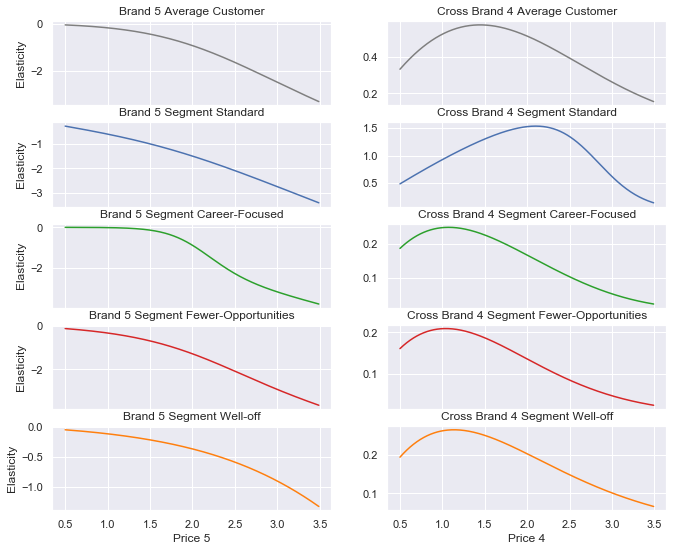

In [71]:
fig1, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 2, figsize = (11, 9), sharex = True)
ax1[0].plot(price_range, own_price_elasticity_brand_5, 'tab:grey')
ax1[0].set_title('Brand 5 Average Customer')
ax1[0].set_ylabel('Elasticity')
ax1[1].plot(price_range, brand5_cross_brand4_price_elasticity, 'tab:grey')
ax1[1].set_title('Cross Brand 4 Average Customer')


ax2[0].plot(price_range, own_price_elasticity_brand_5_s0)
ax2[0].set_title('Brand 5 Segment Standard')
ax2[0].set_ylabel('Elasticity')
ax2[1].plot(price_range, brand5_cross_brand4_price_elasticity_s0)
ax2[1].set_title('Cross Brand 4 Segment Standard')

ax3[0].plot(price_range, own_price_elasticity_brand_5_s1, 'tab:green')
ax3[0].set_title('Brand 5 Segment Career-Focused')
ax3[0].set_ylabel('Elasticity')
ax3[1].plot(price_range, brand5_cross_brand4_price_elasticity_s1, 'tab:green')
ax3[1].set_title('Cross Brand 4 Segment Career-Focused')

ax4[0].plot(price_range, own_price_elasticity_brand_5_s2, 'tab:red')
ax4[0].set_title('Brand 5 Segment Fewer-Opportunities')
ax4[0].set_ylabel('Elasticity')
ax4[1].plot(price_range, brand5_cross_brand4_price_elasticity_s2, 'tab:red')
ax4[1].set_title('Cross Brand 4 Segment Fewer-Opportunities')

ax5[0].plot(price_range, own_price_elasticity_brand_5_s3, 'tab:orange')
ax5[0].set_title('Brand 5 Segment Well-off')
ax5[0].set_xlabel('Price 5')
ax5[0].set_ylabel('Elasticity')
ax5[1].plot(price_range, brand5_cross_brand4_price_elasticity_s3, 'tab:orange')
ax5[1].set_title('Cross Brand 4 Segment Well-off')
ax5[1].set_xlabel('Price 4')